In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive
import numpy as np

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Load all of the data

**Notes:** To make sure you don't need to load the data to the colab everytime running it, create a folder called data on your google drive, then inside the data folder, create another folder called Data Mining Project and upload the orders.csv, train_customers.csv, train_locations.csv, and vendors.csv data on the Data Mining folder. Colab will connect to your google drive and you can directly run the 4 dataframe below here.

In [ ]:
customer = pd.read_csv("/content/drive/MyDrive/data/Data Mining Project/train_customers.csv")
location = pd.read_csv("/content/drive/MyDrive/data/Data Mining Project/train_locations.csv")
order = pd.read_csv("/content/drive/MyDrive/data/Data Mining Project/orders.csv")
vendor = pd.read_csv("/content/drive/MyDrive/data/Data Mining Project/vendors.csv")

<ipython-input-5-c808ecadd5e8>:3: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  order = pd.read_csv("/content/drive/MyDrive/data/Data Mining Project/orders.csv")


### Customer Data Cleaning

In [ ]:
customer.head()

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
0,TCHWPBT,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23
1,ZGFSYCZ,Male,NaN,1,1,EN,2018-02-09 12:04:42,2018-02-09 12:04:41
2,S2ALZFL,Male,NaN,0,1,EN,2018-03-14 18:31:43,2018-03-14 18:31:42
3,952DBJQ,Male,NaN,1,1,EN,2018-03-15 19:47:07,2018-03-15 19:47:07
4,1IX6FXS,Male,NaN,1,1,EN,2018-03-15 19:57:01,2018-03-15 19:57:01


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34674 entries, 0 to 34673
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   akeed_customer_id  34674 non-null  object 
 1   gender             22520 non-null  object 
 2   dob                3046 non-null   float64
 3   status             34674 non-null  int64  
 4   verified           34674 non-null  int64  
 5   language           21099 non-null  object 
 6   created_at         34674 non-null  object 
 7   updated_at         34674 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.1+ MB


In [ ]:
customer['created_at'] = pd.to_datetime(customer['created_at'])
customer['updated_at'] = pd.to_datetime(customer['updated_at'])

In [ ]:
# check duplicated data
customer[customer.duplicated()]

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at


In [ ]:
# check whether customer data are distinct, if it is distinct, then we can drop the created_at and updated_at. Both variables means that the user create an account and when do they update the demographic data.
customer['akeed_customer_id'].value_counts().sort_values(ascending=False)

,count
akeed_customer_id,
0FOCFVI,17
H0GVNAK,16
XFQVCSZ,9
U0SUJYS,7
F30RUYT,7
...,...
217U1L0,1
WAAAETO,1
POWQ3RR,1


In [ ]:
customer[customer['akeed_customer_id'] == '0FOCFVI'].sort_values('updated_at', ascending=False)

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
24306,0FOCFVI,Male,1970.0,1,1,NaN,2019-11-25 20:44:04,2019-11-25 22:23:12
24327,0FOCFVI,male,NaN,1,0,NaN,2019-11-25 22:04:20,2019-11-25 22:04:20
24326,0FOCFVI,male,NaN,1,0,NaN,2019-11-25 22:04:10,2019-11-25 22:04:10
24325,0FOCFVI,male,NaN,1,0,NaN,2019-11-25 22:03:59,2019-11-25 22:03:59
24324,0FOCFVI,male,NaN,1,0,NaN,2019-11-25 22:03:32,2019-11-25 22:03:32
24322,0FOCFVI,male,NaN,1,0,NaN,2019-11-25 21:57:31,2019-11-25 21:57:31
24318,0FOCFVI,male,NaN,1,0,NaN,2019-11-25 20:45:58,2019-11-25 20:45:58
24317,0FOCFVI,male,NaN,1,0,NaN,2019-11-25 20:45:54,2019-11-25 20:45:54
24316,0FOCFVI,male,NaN,1,0,NaN,2019-11-25 20:45:48,2019-11-25 20:45:48
24315,0FOCFVI,male,NaN,1,0,NaN,2019-11-25 20:45:37,2019-11-25 20:45:37


Let's keep the last updated data for each akeed_customer_id. From the example here, the customer df is not clean. It can be seen that there can be multiple entries for a single customer id.

In [ ]:
df_cust = customer.loc[customer.groupby('akeed_customer_id')['updated_at'].idxmax()].reset_index(drop = True)
df_cust.head()

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
0,000THBA,Male,NaN,1,1,EN,2018-11-14 13:50:26,2018-11-14 13:50:25
1,001XN9X,Male,1973.0,1,1,EN,2019-03-29 23:16:34,2019-03-29 23:16:34
2,001ZNTK,NaN,NaN,1,1,NaN,2020-01-30 22:05:00,2020-01-30 22:05:18
3,002510Y,NaN,NaN,1,1,EN,2019-06-14 02:28:19,2019-10-01 18:46:07
4,005ECL6,male,NaN,1,1,NaN,2019-12-30 11:44:14,2019-12-30 11:45:06


In [ ]:
# checking the customer that have multiple entried on the customer data.
df_cust[df_cust['akeed_customer_id'] == '0FOCFVI']

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
431,0FOCFVI,Male,1970.0,1,1,NaN,2019-11-25 20:44:04,2019-11-25 22:23:12


In [ ]:
# make sure it's distinct already
df_cust['akeed_customer_id'].value_counts().sort_values(ascending=False)

,count
akeed_customer_id,
000THBA,1
00NAL8D,1
005ECL6,1
0075AM7,1
009UFS1,1
...,...
ZZVLIB5,1
ZZWKMGG,1
ZZY3N0D,1


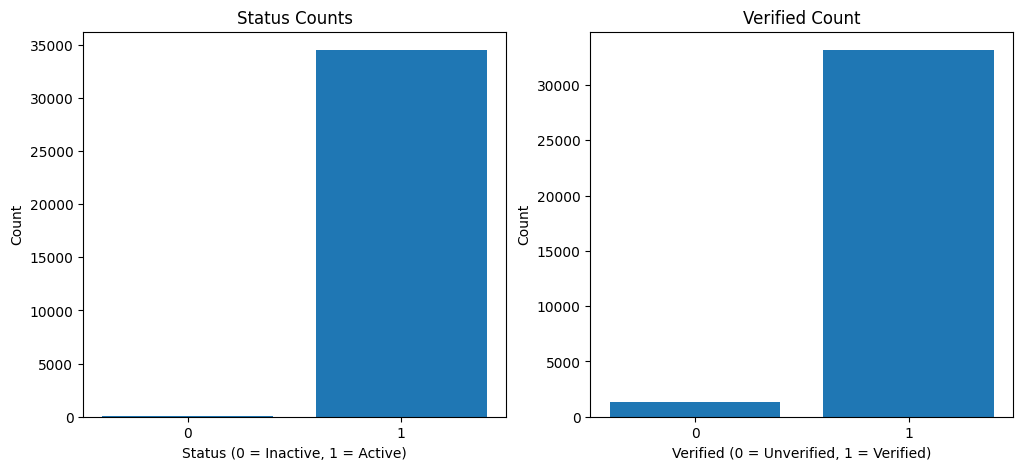

In [ ]:
status_count = df_cust['status'].value_counts().sort_index()
verified_count = df_cust['verified'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize = (12, 5))

axes[0].bar(status_count.index.astype(str), status_count.values)
axes[0].set_title('Status Counts')
axes[0].set_xlabel('Status (0 = Inactive, 1 = Active)')
axes[0].set_ylabel('Count')

axes[1].bar(verified_count.index.astype(str), verified_count.values)
axes[1].set_title("Verified Count")
axes[1].set_xlabel('Verified (0 = Unverified, 1 = Verified)')
axes[1].set_ylabel("Count")

plt.show();

In [ ]:
# we don't need the updated_at and created_at, so let's drop the columns. Based on the bar chart above, it doesn't really matter for the status and verified. Most of them are active and verified.
df_cust.drop(['created_at', 'updated_at', 'status', 'verified'], axis=1, inplace=True)

In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34523 entries, 0 to 34522
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   akeed_customer_id  34523 non-null  object 
 1   gender             22369 non-null  object 
 2   dob                3046 non-null   float64
 3   language           21099 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
df_cust['gender'].value_counts()

,count
gender,
Male,17815
male,2763
Female,1761
Female,13
Male,9
?????,2
Female,2
Female,2
,1


In [ ]:
# need to clean the gender, so that it will belongs to 2 category only Female and Male. For the Null values, let's input it as Unknown
df_cust['gender'] = df_cust['gender'].str.strip() # remove the trailing space
df_cust['gender'] = df_cust['gender'].str.title() # make the first word as capital letter
df_cust['gender'].unique()

array(['Male', nan, 'Female', '?????', ''], dtype=object)

In [ ]:
df_cust['gender'] = df_cust['gender'].fillna('Unknown')
df_cust.loc[~df_cust['gender'].isin(['Male', 'Female']), 'gender'] = 'Unknown'
df_cust['gender'].value_counts()

,count
gender,
Male,20587
Unknown,12157
Female,1779


In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34523 entries, 0 to 34522
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   akeed_customer_id  34523 non-null  object 
 1   gender             34523 non-null  object 
 2   dob                3046 non-null   float64
 3   language           21099 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
df_cust['dob'].describe()

,dob
count,3046.000000
mean,1991.210768
std,48.422045
min,1.000000
25%,1986.000000
50%,1993.000000
75%,1999.000000
max,2562.000000


In [ ]:
# the maximum date of birth -> 2562. dob is a year for the date of birth. it doesn't make sense to have year 2562.
df_cust[df_cust['dob'] > 2020]

,akeed_customer_id,gender,dob,language
29787,V3CJI0I,Female,2531.0,EN
34359,ZUEOZFA,Male,2562.0,EN


In [ ]:
# it doesn't make sense as well for user with date of birth < 1945
df_cust[df_cust['dob'] < 1945]

,akeed_customer_id,gender,dob,language
975,10N0M1P,Male,1900.0,EN
4076,4AGDTIL,Female,1.0,EN
4768,518C5JS,Female,1888.0,NaN
7556,7ZAVFGX,Male,676.0,NaN
8265,8OBBKIA,Male,1398.0,NaN
11271,BR2JRG5,Male,1900.0,EN
13204,DU64UUG,Male,1900.0,EN
20028,KYNRCCJ,Female,1934.0,EN
32039,XG4SHUG,Female,1900.0,EN


In [ ]:
# i will set it to null values for unsense dob
df_cust['dob'] = pd.to_numeric(df_cust['dob'], errors='coerce')
df_cust.loc[df_cust['dob'] > 2020, 'dob'] = np.nan
df_cust.loc[df_cust['dob'] < 1945, 'dob'] = np.nan

In [ ]:
df_cust['dob'].describe()

,dob
count,3035.000000
mean,1992.302471
std,11.890851
min,1953.000000
25%,1986.000000
50%,1993.000000
75%,1999.000000
max,2020.000000


In [ ]:
df_cust['language'].unique()

array(['EN', nan], dtype=object)

In [ ]:
# since the unique value of language is either english or NaN, most probably the apps is only available on english, so we can drop this variable as well because it doesn't give any insights
df_cust.drop('language', axis=1, inplace=True)

In [ ]:
df_cust.head()

,akeed_customer_id,gender,dob
0,000THBA,Male,NaN
1,001XN9X,Male,1973.0
2,001ZNTK,Unknown,NaN
3,002510Y,Unknown,NaN
4,005ECL6,Male,NaN


### Location Data Cleaning

In [ ]:
location.head()

,customer_id,location_number,location_type,latitude,longitude
0,02SFNJH,0,NaN,1.682392,-78.789737
1,02SFNJH,1,NaN,1.679137,0.766823
2,02SFNJH,2,NaN,-0.498648,0.661241
3,RU43CXC,0,Home,0.100853,0.438165
4,BDFBPRD,0,NaN,2.523125,0.733464


In [ ]:
# check duplicated data
location[location.duplicated()]

,customer_id,location_number,location_type,latitude,longitude


In [ ]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59503 entries, 0 to 59502
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      59503 non-null  object 
 1   location_number  59503 non-null  int64  
 2   location_type    32294 non-null  object 
 3   latitude         59497 non-null  float64
 4   longitude        59497 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.3+ MB


In [ ]:
# from the info function, there are 6 data without latitude and longitude
location[location[['latitude', 'longitude']].isna().any(axis=1)]

,customer_id,location_number,location_type,latitude,longitude
24726,7URX8JP,0,Other,NaN,NaN
35657,NSQRO1H,2,NaN,NaN,NaN
42953,55MCNEF,0,Home,NaN,NaN
45266,VZIK43C,2,NaN,NaN,NaN
50037,QFWLNUK,2,NaN,NaN,NaN
59198,O0LALCF,0,NaN,NaN,NaN


In [ ]:
# since there are just 6 of them, I will drop the data, and also location is not the main table. so it is okay to do so
df_loc = location.dropna(subset=['latitude', 'longitude'])
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59497 entries, 0 to 59502
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      59497 non-null  object 
 1   location_number  59497 non-null  int64  
 2   location_type    32292 non-null  object 
 3   latitude         59497 non-null  float64
 4   longitude        59497 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
location['location_type'].value_counts()

,count
location_type,
Home,19703
Work,6441
Other,6150


In [ ]:
# fill in the nan as other
df_loc['location_type'] = df_loc['location_type'].fillna('Other')
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59497 entries, 0 to 59502
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      59497 non-null  object 
 1   location_number  59497 non-null  int64  
 2   location_type    59497 non-null  object 
 3   latitude         59497 non-null  float64
 4   longitude        59497 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.7+ MB


<ipython-input-35-100b02ab6fd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['location_type'] = df_loc['location_type'].fillna('Other')


### Analyze Order Data

In [ ]:
order.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83


In [ ]:
order[order.duplicated()]

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR


In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135303 entries, 0 to 135302
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   akeed_order_id                  135233 non-null  float64
 1   customer_id                     135303 non-null  object 
 2   item_count                      128378 non-null  float64
 3   grand_total                     135303 non-null  float64
 4   payment_mode                    135303 non-null  int64  
 5   promo_code                      4305 non-null    object 
 6   vendor_discount_amount          135303 non-null  float64
 7   promo_code_discount_percentage  65880 non-null   float64
 8   is_favorite                     100108 non-null  object 
 9   is_rated                        135303 non-null  object 
 10  vendor_rating                   45220 non-null   float64
 11  driver_rating                   135303 non-null  float64
 12  deliverydistance

In [ ]:
order['promo_code'].unique()

array([nan, 'akeedPDO', 'akeedpdo', ..., 'akeed410052', 'NU381Y4D7',
       'NUE5BZAA7'], dtype=object)

In [ ]:
# convert if not null = 1, if null = 0 (no promo)
df_order = order.copy()
df_order['promo_code'] = df_order['promo_code'].notna().astype(int)
df_order['promo_code'].value_counts()

,count
promo_code,
0,130998
1,4305


In [ ]:
df_order['promo_code_discount_percentage'].unique()

array([nan,  0., 10., 25., 20.])

In [ ]:
# change nan to 0, means that there is no discount on it
df_order['promo_code_discount_percentage'] = df_order['promo_code_discount_percentage'].fillna(0)
df_order['promo_code_discount_percentage'].unique()

array([ 0., 10., 25., 20.])

In [ ]:
df_order['item_count'].unique()

array([ 1.,  2.,  4.,  3.,  5.,  8.,  6., 11., 10.,  7., 12., 38.,  9.,
       15., 14., 16., 19., 13., 17., 18., 27., 20., 34., 22., 21., 47.,
       41., 26., 24., 28., 25., nan, 40., 33., 30., 68.])

In [ ]:
# for item count, we imputed median group by the customer id
df_order['item_count'] = df_order.groupby('customer_id')['item_count'].transform(lambda x: x.fillna(x.median()))

# if there still exist null values, can impute with the median of the whole data
df_order['item_count'] = df_order['item_count'].fillna(df_order['item_count'].median())

In [ ]:
df_order['is_favorite'].value_counts()

,count
is_favorite,
No,98449
Yes,1659


In [ ]:
# change null values to no beacuse it means the restaurant is not under the favorite tag
df_order['is_favorite'] = df_order['is_favorite'].fillna("No")
df_order['is_favorite'].value_counts()

,count
is_favorite,
No,133644
Yes,1659


In [ ]:
print(df_order['vendor_rating'].unique())
df_order['vendor_rating'].value_counts()

[nan  5.  4.  2.  1.  3.  0.]


,count
vendor_rating,
0.0,25175
5.0,14212
4.0,2748
3.0,1426
1.0,1029
2.0,630


In [ ]:
# if the vendor is not rated, it means that there is no rating on the vendor. so we will impute it with 0
df_order['vendor_rating'] = df_order['vendor_rating'].fillna(0)
df_order['vendor_rating'].value_counts()

,count
vendor_rating,
0.0,115258
5.0,14212
4.0,2748
3.0,1426
1.0,1029
2.0,630


In [ ]:
df_order['preparationtime'].unique()

array([nan, 35., 45., 40., 50., 60., 55., 65., 30., 75., 70., 85., 80.,
       90., 25.])

In [ ]:
# fill in the preparation time of the median for each vendor
df_order['preparationtime'] = df_order.groupby('vendor_id')['preparationtime'].transform(lambda x: x.fillna(x.median()))

# the remaining one, will be imputed by the median after imputing based on the vendor
df_order['preparationtime'] = df_order['preparationtime'].fillna(df_order['preparationtime'].median())

In [ ]:
df_order['preparationtime'].unique()

array([45., 50., 55., 40., 60., 70., 35., 65., 30., 75., 85., 80., 90.,
       25.])

In [ ]:
# non-null only 5123, null values more than 100k. Thus, we decided to drop this variable
df_order = df_order.drop('delivery_time', axis=1)

In [ ]:
df_order['order_accepted_time'].unique()

array([nan, '2019-10-02 05:46:33', '2019-10-02 05:57:31', ...,
       '2020-02-29 23:49:16', '2020-02-29 23:54:38',
       '2020-02-29 23:58:04'], dtype=object)

In [ ]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135303 entries, 0 to 135302
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   akeed_order_id                  135233 non-null  float64
 1   customer_id                     135303 non-null  object 
 2   item_count                      135303 non-null  float64
 3   grand_total                     135303 non-null  float64
 4   payment_mode                    135303 non-null  int64  
 5   promo_code                      135303 non-null  int64  
 6   vendor_discount_amount          135303 non-null  float64
 7   promo_code_discount_percentage  135303 non-null  float64
 8   is_favorite                     135303 non-null  object 
 9   is_rated                        135303 non-null  object 
 10  vendor_rating                   135303 non-null  float64
 11  driver_rating                   135303 non-null  float64
 12  deliverydistance

#### Not sure what to do with the order_accepted_time, driver_accepted_time, ready_for_pickup_time, picked_up_time, delivered_time, and delivery_date because it will be distinct for every order. However, we may need it to check whether their usual order is the opening time for the restuarant or not.

In [ ]:
df_order['LOCATION_TYPE'].unique()

array([nan, 'Work', 'Home', 'Other'], dtype=object)

In [ ]:
# in the df_loc, we impute nan as Other. Thus, we can impute it as others as well to make it tally
df_order['LOCATION_TYPE'] = df_order['LOCATION_TYPE'].fillna('Other')
df_order['LOCATION_TYPE'].unique()

array(['Other', 'Work', 'Home'], dtype=object)

In [ ]:
# CID X LOC_NUM X VENDOR is a unique tagging to do a prediction. So, we don't need it. We can drop it
df_order = df_order.drop('CID X LOC_NUM X VENDOR', axis=1)

In [ ]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135303 entries, 0 to 135302
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   akeed_order_id                  135233 non-null  float64
 1   customer_id                     135303 non-null  object 
 2   item_count                      135303 non-null  float64
 3   grand_total                     135303 non-null  float64
 4   payment_mode                    135303 non-null  int64  
 5   promo_code                      135303 non-null  int64  
 6   vendor_discount_amount          135303 non-null  float64
 7   promo_code_discount_percentage  135303 non-null  float64
 8   is_favorite                     135303 non-null  object 
 9   is_rated                        135303 non-null  object 
 10  vendor_rating                   135303 non-null  float64
 11  driver_rating                   135303 non-null  float64
 12  deliverydistance

In [ ]:
df_order['akeed_order_id'].value_counts()

,count
akeed_order_id,
230684.0,2
253208.0,2
230681.0,2
230682.0,2
230686.0,2
...,...
222156.0,1
222141.0,1
222139.0,1


In [ ]:
df_order.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE
0,163238.0,92PEE24,1.0,7.6,2,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,Other
1,163240.0,QS68UD8,1.0,8.7,1,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work
2,163241.0,MB7VY5F,2.0,14.4,1,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,Other
3,163244.0,KDJ951Y,1.0,7.1,1,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home
4,163245.0,BAL0RVT,4.0,27.2,1,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work


In [ ]:
df_duplicate_orders = df_order[df_order.duplicated(subset=['akeed_order_id'], keep=False)]
df_sorted = df_duplicate_orders.sort_values(by=['akeed_order_id', 'created_at'], ascending=[True, True])
df_duplicate_orders

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE
48644,230681.0,Z6DDRUJ,1.0,13.3,2,0,0.0,0.0,No,No,...,2019-10-21 11:50:46,NaN,2019-10-21 12:02:01,2019-10-21 16:03:19,2019-10-21 16:16:31,NaN,134,2019-10-21 15:49:21,2,Work
48645,230682.0,IZYQ28O,2.0,8.2,1,0,0.0,0.0,No,No,...,2019-10-21 12:11:45,NaN,2019-10-21 12:11:51,2019-10-21 16:31:36,2019-10-21 16:55:13,NaN,459,2019-10-21 15:49:22,1,Home
48646,230684.0,W35F18A,2.0,9.2,2,0,0.0,0.0,No,No,...,2019-10-21 12:13:41,NaN,2019-10-21 12:26:25,2019-10-21 16:35:17,2019-10-21 16:46:52,NaN,104,2019-10-21 15:50:58,1,Home
48647,230686.0,R90B4BY,1.0,5.2,1,0,0.0,0.0,No,No,...,2019-10-21 12:03:58,NaN,2019-10-21 12:27:30,2019-10-21 16:46:44,2019-10-21 17:19:23,NaN,419,2019-10-21 15:55:30,0,Work
48648,230637.0,2LWS99M,2.0,7.3,2,0,0.0,0.0,No,No,...,2019-10-21 12:00:12,NaN,2019-10-21 12:00:20,2019-10-21 16:01:24,2019-10-21 16:01:31,NaN,4,2019-10-21 11:57:09,1,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113323,NaN,OB9AH6K,1.0,0.0,5,1,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,145,2020-02-02 23:35:19,0,Other
118235,NaN,AIOLWXY,1.0,0.0,5,1,0.0,0.0,No,No,...,2020-02-08 21:11:19,NaN,2020-02-08 21:11:24,NaN,NaN,NaN,846,2020-02-08 21:08:17,0,Home
118236,NaN,AIOLWXY,1.0,0.0,5,1,0.0,0.0,No,No,...,2020-02-08 21:11:44,NaN,2020-02-08 21:11:53,NaN,NaN,NaN,846,2020-02-08 21:08:23,0,Home
118239,NaN,AIOLWXY,1.0,0.0,5,1,0.0,0.0,No,No,...,2020-02-08 21:12:10,NaN,2020-02-08 21:12:30,NaN,NaN,NaN,846,2020-02-08 21:08:32,0,Home


In [ ]:
# let's check the non_null akeed_order_id
not_na_duplicate_order = df_duplicate_orders[df_duplicate_orders['akeed_order_id'].notna()]
not_na_duplicate_order.sort_values(by = ['akeed_order_id', 'created_at'])

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE
48648,230637.0,2LWS99M,2.0,7.3,2,0,0.0,0.0,No,No,...,2019-10-21 12:00:12,NaN,2019-10-21 12:00:20,2019-10-21 16:01:24,2019-10-21 16:01:31,NaN,4,2019-10-21 11:57:09,1,Other
48656,230637.0,2LWS99M,2.0,7.3,2,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,4,2019-10-21 16:37:21,0,Other
48649,230638.0,NLKK7E0,2.5,6.0,1,0,0.0,0.0,No,No,...,2019-10-21 12:01:16,NaN,2019-10-21 12:01:23,2019-10-21 16:40:50,2019-10-21 17:02:06,NaN,105,2019-10-21 11:57:09,0,Other
48657,230638.0,NLKK7E0,2.5,6.0,1,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,105,2019-10-21 16:37:51,1,Other
48644,230681.0,Z6DDRUJ,1.0,13.3,2,0,0.0,0.0,No,No,...,2019-10-21 11:50:46,NaN,2019-10-21 12:02:01,2019-10-21 16:03:19,2019-10-21 16:16:31,NaN,134,2019-10-21 15:49:21,2,Work
48678,230681.0,Z6DDRUJ,2.0,13.3,2,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,134,2019-10-21 17:19:01,0,Other
48645,230682.0,IZYQ28O,2.0,8.2,1,0,0.0,0.0,No,No,...,2019-10-21 12:11:45,NaN,2019-10-21 12:11:51,2019-10-21 16:31:36,2019-10-21 16:55:13,NaN,459,2019-10-21 15:49:22,1,Home
48679,230682.0,IZYQ28O,2.0,8.2,1,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,459,2019-10-21 17:19:22,0,Other
48646,230684.0,W35F18A,2.0,9.2,2,0,0.0,0.0,No,No,...,2019-10-21 12:13:41,NaN,2019-10-21 12:26:25,2019-10-21 16:35:17,2019-10-21 16:46:52,NaN,104,2019-10-21 15:50:58,1,Home
48680,230684.0,W35F18A,3.0,9.2,2,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,104,2019-10-21 17:20:58,2,Home


In [ ]:
# most of them are just duplicated, so i will remove the index for the akeed_order_id with the last created_at and save the first creation of the order_id
index_to_drop = not_na_duplicate_order.sort_values('created_at').groupby('akeed_order_id').tail(1).index
df_order = df_order.drop(index_to_drop)

In [ ]:
# now let's solve for the na duplicated
na_duplicate_order = df_duplicate_orders[df_duplicate_orders['akeed_order_id'].isna()]
na_duplicate_order

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE
94367,NaN,H0KPCSI,3.0,0.0,5,1,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,401,2020-01-01 22:30:57,8,Home
94369,NaN,H0KPCSI,3.0,0.0,5,1,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,401,2020-01-01 22:31:09,8,Home
94370,NaN,H0KPCSI,3.0,0.0,5,1,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,401,2020-01-01 22:32:03,8,Home
94373,NaN,H0KPCSI,3.0,0.0,5,1,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,401,2020-01-01 22:32:26,8,Home
94379,NaN,H0KPCSI,3.0,0.0,5,1,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,401,2020-01-01 22:35:31,8,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113323,NaN,OB9AH6K,1.0,0.0,5,1,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,145,2020-02-02 23:35:19,0,Other
118235,NaN,AIOLWXY,1.0,0.0,5,1,0.0,0.0,No,No,...,2020-02-08 21:11:19,NaN,2020-02-08 21:11:24,NaN,NaN,NaN,846,2020-02-08 21:08:17,0,Home
118236,NaN,AIOLWXY,1.0,0.0,5,1,0.0,0.0,No,No,...,2020-02-08 21:11:44,NaN,2020-02-08 21:11:53,NaN,NaN,NaN,846,2020-02-08 21:08:23,0,Home
118239,NaN,AIOLWXY,1.0,0.0,5,1,0.0,0.0,No,No,...,2020-02-08 21:12:10,NaN,2020-02-08 21:12:30,NaN,NaN,NaN,846,2020-02-08 21:08:32,0,Home


In [ ]:
# Every order should have a distinct order_id. In here, it is quite confusing for customer who have an order but without order_id. Since it is just 70 rows out of 100k rows, let's just drop it.
df_order = df_order.dropna(subset=['akeed_order_id'])
df_order['akeed_order_id'].value_counts()

,count
akeed_order_id,
163238.0,1
312194.0,1
312220.0,1
312219.0,1
312215.0,1
...,...
222112.0,1
222071.0,1
222067.0,1


### Vendor Data Cleaning

From my perspective, I saw that some of the vendor tags are already on the order data. The vendor dataset will be used for the recommendation purpose whether they are open at the moment they open the application or not by giving them a recommendation based on real time. It doesn't make sense to join the vendor all data into the whole dataset. Let's say there are a lot of variables like sunday_from_time1 and sunday_to_time_1 which means, the time the vendor opens on sunday. If we join it to the main table, it won't have a lot of meaning onto it.

In [ ]:
vendor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   authentication_id     100 non-null    float64
 2   latitude              100 non-null    float64
 3   longitude             100 non-null    float64
 4   vendor_category_en    100 non-null    object 
 5   vendor_category_id    100 non-null    float64
 6   delivery_charge       100 non-null    float64
 7   serving_distance      100 non-null    float64
 8   is_open               100 non-null    float64
 9   OpeningTime           91 non-null     object 
 10  OpeningTime2          91 non-null     object 
 11  prepration_time       100 non-null    int64  
 12  commission            85 non-null     float64
 13  is_akeed_delivering   100 non-null    object 
 14  discount_percentage   100 non-null    float64
 15  status                10

### Joining Data Frame
Here, for the clustering, what we need is the user demographic with the order. The vendor will be use for the recommendation system later on. So, here we will join the clean user and order dataframe.

In [ ]:
df_order.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE
0,163238.0,92PEE24,1.0,7.6,2,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,Other
1,163240.0,QS68UD8,1.0,8.7,1,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work
2,163241.0,MB7VY5F,2.0,14.4,1,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,Other
3,163244.0,KDJ951Y,1.0,7.1,1,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home
4,163245.0,BAL0RVT,4.0,27.2,1,0,0.0,0.0,No,No,...,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work


In [ ]:
df_cust.head()

,akeed_customer_id,gender,dob
0,000THBA,Male,NaN
1,001XN9X,Male,1973.0
2,001ZNTK,Unknown,NaN
3,002510Y,Unknown,NaN
4,005ECL6,Male,NaN


In [ ]:
df_loc.head()

,customer_id,location_number,location_type,latitude,longitude
0,02SFNJH,0,Other,1.682392,-78.789737
1,02SFNJH,1,Other,1.679137,0.766823
2,02SFNJH,2,Other,-0.498648,0.661241
3,RU43CXC,0,Home,0.100853,0.438165
4,BDFBPRD,0,Other,2.523125,0.733464


In [ ]:
df_cust = df_cust.rename(columns={'akeed_customer_id': 'customer_id'})
df_order_cust = pd.merge(df_order, df_cust, on='customer_id', how='left')
df_loc = df_loc.rename(columns = {'location_number': "LOCATION_NUMBER", 'location_type': "LOCATION_TYPE"})
df_order_full = pd.merge(df_order_cust, df_loc,
                         on=['customer_id', 'LOCATION_NUMBER', 'LOCATION_TYPE'],
                         how='left')

In [ ]:
df_order_full.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,gender,dob,latitude,longitude
0,163238.0,92PEE24,1.0,7.6,2,0,0.0,0.0,No,No,...,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,Other,Male,NaN,-0.132100,-78.575297
1,163240.0,QS68UD8,1.0,8.7,1,0,0.0,0.0,No,No,...,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,Unknown,NaN,-0.393396,-78.544417
2,163241.0,MB7VY5F,2.0,14.4,1,0,0.0,0.0,No,No,...,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,Other,Unknown,NaN,-1.072823,-78.464121
3,163244.0,KDJ951Y,1.0,7.1,1,0,0.0,0.0,No,No,...,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,Male,NaN,-0.292713,-78.556316
4,163245.0,BAL0RVT,4.0,27.2,1,0,0.0,0.0,No,No,...,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,Male,NaN,-0.231810,-78.563513


In [ ]:
df_order_full[df_order_full['latitude'].isna()]

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,gender,dob,latitude,longitude
90,163407.0,FWNWSYH,1.0,7.6,1,0,0.0,0.0,No,No,...,NaN,2019-08-01 05:30:00,4,2019-08-01 18:54:21,0,Work,Male,NaN,NaN,NaN
154,163537.0,5ISO1P9,3.0,7.9,1,0,0.0,0.0,No,No,...,NaN,2019-08-01 05:30:00,196,2019-08-01 20:47:32,0,Other,Unknown,NaN,NaN,NaN
175,163573.0,WB681BO,2.0,11.7,2,0,0.0,0.0,No,Yes,...,NaN,2019-08-01 05:30:00,271,2019-08-01 21:25:42,0,Home,Male,NaN,NaN,NaN
195,163618.0,FWNWSYH,5.0,42.4,1,0,0.0,0.0,No,No,...,NaN,2019-08-01 05:30:00,20,2019-08-01 23:15:01,0,Other,Male,NaN,NaN,NaN
403,164054.0,DB9TN5D,4.0,12.0,1,0,0.0,0.0,No,No,...,NaN,2019-08-02 05:30:00,157,2019-08-02 20:31:01,0,Work,Female,1997.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135168,415338.0,SKIEK8R,2.0,10.6,2,0,0.0,0.0,No,Yes,...,2020-03-01 00:12:35,NaN,79,2020-02-29 22:55:36,1,Work,Unknown,NaN,NaN,NaN
135188,415401.0,3NKEFBB,2.0,16.4,2,0,0.0,0.0,No,No,...,2020-02-29 23:47:30,NaN,846,2020-02-29 23:12:37,1,Home,Unknown,NaN,NaN,NaN
135193,415421.0,B0SIVPQ,2.0,9.8,1,0,0.0,0.0,No,No,...,2020-02-29 23:57:43,NaN,79,2020-02-29 23:17:36,1,Work,Male,NaN,NaN,NaN
135207,415463.0,NE6ZHRW,3.0,43.6,2,0,0.0,0.0,Yes,Yes,...,2020-03-01 01:37:01,NaN,188,2020-02-29 23:33:05,0,Home,Male,NaN,NaN,NaN


In [ ]:
df_loc[df_loc['customer_id'] == 'FWNWSYH']

,customer_id,LOCATION_NUMBER,LOCATION_TYPE,latitude,longitude
6856,FWNWSYH,0,Home,-0.214270,-78.565586
6857,FWNWSYH,1,Home,-0.352896,-78.549203
6858,FWNWSYH,2,Home,-0.565603,-78.524065
6859,FWNWSYH,3,Other,-0.024611,-78.588000
6860,FWNWSYH,4,Other,-0.220511,0.857357
6861,FWNWSYH,5,Other,-0.438038,0.857031
6862,FWNWSYH,6,Other,-0.080105,0.456155
6863,FWNWSYH,7,Work,-0.354447,0.649254
6864,FWNWSYH,8,Home,-0.028963,0.650094


In [ ]:
# from the result above, we can see that there can be no tally location type. So, in here, let me drop the location type from the df_order_full first, and also latitude longitude, then join again by the customer_id and location_number
df_order_full = df_order_full.drop(['LOCATION_TYPE', 'latitude', 'longitude'], axis=1)
df_order_full = pd.merge(df_order_full, df_loc,
                         on=['customer_id', 'LOCATION_NUMBER'],
                         how='left')

In [ ]:
df_order_full[df_order_full['latitude'].isna()]

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,gender,dob,LOCATION_TYPE,latitude,longitude
31060,134925.0,55MCNEF,7.0,22.0,1,0,0.0,0.0,No,No,...,NaN,2019-06-18 00:00:00,231,2019-06-18 17:08:22,0,Unknown,NaN,NaN,NaN,NaN
31553,135872.0,7URX8JP,1.0,9.0,1,0,0.0,0.0,No,No,...,NaN,2019-06-19 00:00:00,83,2019-06-19 23:17:41,0,Male,NaN,NaN,NaN,NaN
43726,11781.0,O0LALCF,2.0,12.0,1,0,0.0,0.0,No,No,...,NaN,NaN,78,2019-10-11 02:22:33,0,Male,NaN,NaN,NaN,NaN
44144,12571.0,QFWLNUK,2.0,31.0,1,0,0.0,0.0,No,No,...,NaN,NaN,78,2019-10-11 02:47:45,2,Male,NaN,NaN,NaN,NaN
44226,13033.0,VZIK43C,2.0,10.1,1,0,0.0,0.0,No,No,...,NaN,NaN,67,2019-10-11 05:41:46,2,Male,NaN,NaN,NaN,NaN


In [ ]:
# the null values for the location is just 5 rows out of 100k rows. So, let's drop this
df_order_full = df_order_full.dropna(subset=['latitude'])
df_order_full[df_order_full['latitude'].isna()]

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,gender,dob,LOCATION_TYPE,latitude,longitude


In [ ]:
df_order_full

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,gender,dob,LOCATION_TYPE,latitude,longitude
0,163238.0,92PEE24,1.0,7.6,2,0,0.0,0.0,No,No,...,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,Male,NaN,Other,-0.132100,-78.575297
1,163240.0,QS68UD8,1.0,8.7,1,0,0.0,0.0,No,No,...,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Unknown,NaN,Work,-0.393396,-78.544417
2,163241.0,MB7VY5F,2.0,14.4,1,0,0.0,0.0,No,No,...,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,Unknown,NaN,Other,-1.072823,-78.464121
3,163244.0,KDJ951Y,1.0,7.1,1,0,0.0,0.0,No,No,...,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Male,NaN,Home,-0.292713,-78.556316
4,163245.0,BAL0RVT,4.0,27.2,1,0,0.0,0.0,No,No,...,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Male,NaN,Work,-0.231810,-78.563513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135216,415507.0,L6LFY6H,1.0,13.3,2,0,0.0,0.0,No,No,...,2020-03-01 00:29:42,NaN,67,2020-02-29 23:47:59,0,Unknown,NaN,Other,-0.207822,0.473790
135217,415508.0,2GMMVGI,3.0,9.5,1,0,0.0,0.0,No,Yes,...,2020-03-01 01:03:14,NaN,79,2020-02-29 23:48:37,0,Male,NaN,Work,1.742466,0.377535
135218,415510.0,LYTAAV0,4.0,18.2,2,0,0.0,0.0,No,No,...,2020-03-01 00:36:37,NaN,28,2020-02-29 23:48:43,2,Male,NaN,Other,0.688098,0.417760
135219,415512.0,NEV9A5D,3.0,7.7,1,1,0.0,0.0,No,No,...,2020-03-01 00:36:52,NaN,841,2020-02-29 23:50:10,0,Unknown,NaN,Other,-0.701674,0.724363


In [ ]:
df_order_full.columns

Index(['akeed_order_id', 'customer_id', 'item_count', 'grand_total',
       'payment_mode', 'promo_code', 'vendor_discount_amount',
       'promo_code_discount_percentage', 'is_favorite', 'is_rated',
       'vendor_rating', 'driver_rating', 'deliverydistance', 'preparationtime',
       'order_accepted_time', 'driver_accepted_time', 'ready_for_pickup_time',
       'picked_up_time', 'delivered_time', 'delivery_date', 'vendor_id',
       'created_at', 'LOCATION_NUMBER', 'gender', 'dob', 'LOCATION_TYPE',
       'latitude', 'longitude'],
      dtype='object')

Iris Comment: I think we can include columns on the characteristic of the vendor data. I would think info like resturants tag (aka. types of cuisine) would be pretty important when we do clustering or recommendation system. I'll pull in just a few more columns.

In [ ]:
vendor_colnames = (['id', 'latitude', 'longitude',
       'vendor_category_en', 'delivery_charge','vendor_tag_name'])
vendor_useful = vendor.loc[:,vendor_colnames]
vendor_useful = vendor_useful.rename(columns={'latitude': 'latitude_vendor', 'longitude': 'longtitude_vendor','id':'vendor_id'})
vendor_useful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vendor_id           100 non-null    int64  
 1   latitude_vendor     100 non-null    float64
 2   longtitude_vendor   100 non-null    float64
 3   vendor_category_en  100 non-null    object 
 4   delivery_charge     100 non-null    float64
 5   vendor_tag_name     97 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB


note that there is three restuarants without any tags

In [ ]:
vendor_useful.describe()

,vendor_id,latitude_vendor,longtitude_vendor,delivery_charge
count,100.000000,100.000000,100.000000,100.000000
mean,288.840000,1.875505,0.803682,0.413000
std,242.299994,20.600857,4.397859,0.346018
min,4.000000,-1.787413,-1.449556,0.000000
25%,105.750000,-0.809124,0.081618,0.000000
50%,202.000000,-0.493421,0.527123,0.700000
75%,387.250000,0.015915,0.644764,0.700000
max,907.000000,205.242327,44.210807,0.700000


In [ ]:
vendor_useful['vendor_category_en'].value_counts()

,count
vendor_category_en,
Restaurants,88
Sweets & Bakes,12


In [ ]:
vendor_useful['vendor_tag_name'].value_counts()

,count
vendor_tag_name,
"American,Breakfast,Burgers,Cafe,Desserts,Free Delivery,Fries,Ice creams,Kids meal,Salads",7
"Coffee,Fresh Juices,Hot Chocolate,Sandwiches,Smoothies",3
"American,Burgers,Free Delivery,Hot Dogs,Pasta",3
"Biryani,Desserts,Indian,Kebabs,Rice",3
"Fresh Juices,Sandwiches,Shawarma",3
...,...
"Breakfast,Burgers,Grills,Pizza,Sandwiches,Shawarma",1
"Arabic,Pizzas,Sandwiches",1
"Burgers,Healthy Food,Milkshakes,Sandwiches,Steaks",1


In [ ]:
import copy
from collections import Counter
temp=copy.deepcopy(vendor_useful)
temp['vendor_tag_name'] = temp['vendor_tag_name'].str.split(',')
unique_vendor_tags = temp['vendor_tag_name'].explode()
Counter(unique_vendor_tags)

Counter({'Arabic': 11,
         'Breakfast': 24,
         'Burgers': 40,
         'Desserts': 44,
         'Free Delivery': 24,
         'Grills': 11,
         'Lebanese': 4,
         'Salads': 33,
         'Sandwiches': 42,
         'Shawarma': 11,
         'Cakes': 4,
         'Crepes': 3,
         'Italian': 4,
         'Pasta': 16,
         'Pizzas': 8,
         'Soups': 14,
         'Indian': 10,
         'Fries': 20,
         'Mexican': 3,
         'American': 27,
         'Milkshakes': 11,
         'Asian': 4,
         'Healthy Food': 5,
         'Japanese': 2,
         'Sushi': 1,
         'Mojitos': 2,
         'Mandazi': 1,
         'Omani': 3,
         'Manakeesh': 1,
         'Kids meal': 15,
         'Donuts': 4,
         'Fresh Juices': 17,
         'Ice creams': 10,
         'Pancakes': 3,
         'Waffles': 3,
         'Mojitos ': 11,
         'Hot Dogs': 5,
         'Dimsum': 1,
         'Rice': 8,
         'Sweets': 3,
         'Steaks': 4,
         'Pizza': 1,
     

In [ ]:
len(Counter(unique_vendor_tags))

69

total of 69 different unique tags; binary encoding might increase dimensionality too much?

Consider TF-IDF - another type of encoding in sklearn (reduces over-represented tags)

In [ ]:
df_order_full_copy=copy.deepcopy(df_order_full)
df_order_full_copy = pd.merge(df_order_full_copy, vendor_useful, on='vendor_id', how='left')
df_order_full_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135216 entries, 0 to 135215
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   akeed_order_id                  135216 non-null  float64
 1   customer_id                     135216 non-null  object 
 2   item_count                      135216 non-null  float64
 3   grand_total                     135216 non-null  float64
 4   payment_mode                    135216 non-null  int64  
 5   promo_code                      135216 non-null  int64  
 6   vendor_discount_amount          135216 non-null  float64
 7   promo_code_discount_percentage  135216 non-null  float64
 8   is_favorite                     135216 non-null  object 
 9   is_rated                        135216 non-null  object 
 10  vendor_rating                   135216 non-null  float64
 11  driver_rating                   135216 non-null  float64
 12  deliverydistance

join looks successful to me. note that the non-null count for vendor_tag_name is less because 3 restuarants have no tags

In [ ]:
df_order_full_copy.to_csv('order_clean_join_all.csv', index=False)

## EDA

### Customer Analysis

In [ ]:
# orders per customers
df_order_full_copy['customer_id'].value_counts()

,count
customer_id,
XW90EAP,262
TL7Z2DM,151
VDEJEMP,146
HJFTTGW,128
B28LJKM,119
...,...
G0AA8JD,1
XXH36PS,1
GZJSTEF,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
customer_order_counts = df_order_full_copy['customer_id'].value_counts()
customer_order_counts.describe()

,count
count,27442.000000
mean,4.927338
std,7.619244
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,262.000000


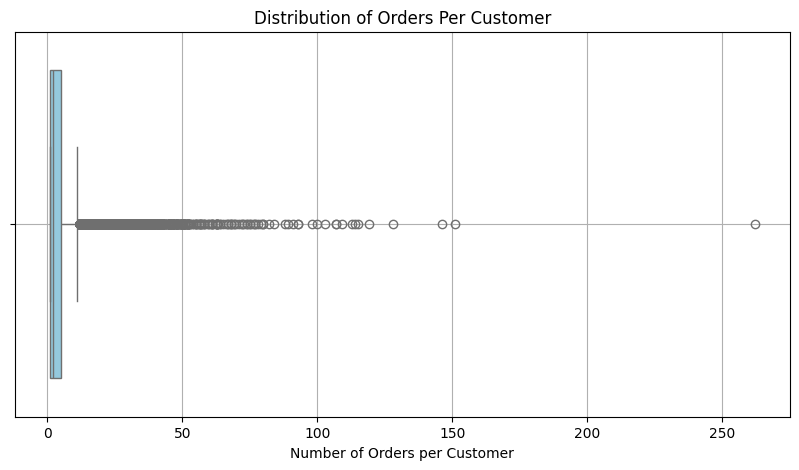

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=customer_order_counts, color='skyblue')
plt.xlabel("Number of Orders per Customer")
plt.title("Distribution of Orders Per Customer")
plt.grid(True)
plt.show()

In [ ]:
# total spending per customer
total_spending_per_customer = df_order_full_copy.groupby('customer_id')['grand_total'].sum()
total_spending_per_customer = total_spending_per_customer.sort_values(ascending=False)
total_spending_per_customer

,grand_total
customer_id,
B28LJKM,3965.5
XW90EAP,3830.6
UO5X10D,3274.6
C8D4BO3,2997.8
VEGWXS8,2558.8
...,...
45R1UDO,0.0
A6Y1NUV,0.0
7TO16RZ,0.0


In [ ]:
total_spending_per_customer.describe()

,grand_total
count,27442.000000
mean,75.784280
std,141.219577
min,0.000000
25%,13.900000
50%,31.500000
75%,80.600000
max,3965.500000


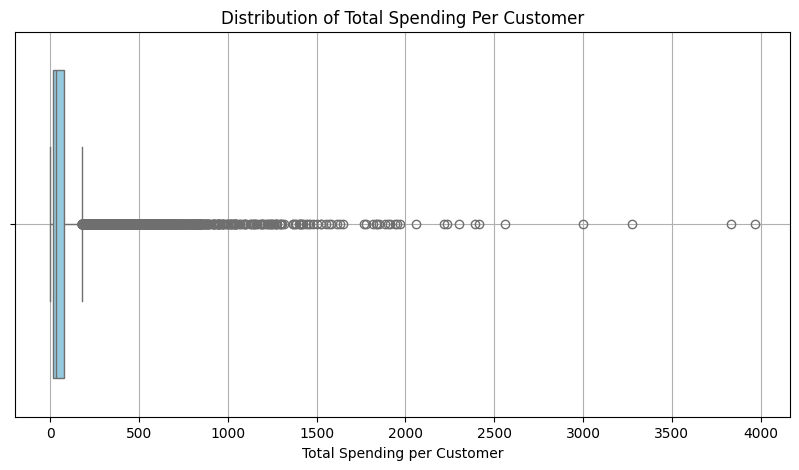

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=total_spending_per_customer, color='skyblue')
plt.xlabel("Total Spending per Customer")
plt.title("Distribution of Total Spending Per Customer")
plt.grid(True)
plt.show()

In [ ]:
total_spending_per_customer[total_spending_per_customer==0] ## 225 customers didnt spend any money at all in all orders

,grand_total
customer_id,
4UVL2GE,0.0
ZF5SBGM,0.0
N585NVK,0.0
SJ3CZ1K,0.0
4PQ1KWX,0.0
...,...
45R1UDO,0.0
A6Y1NUV,0.0
7TO16RZ,0.0


In [ ]:
customers_no_spending = total_spending_per_customer[total_spending_per_customer == 0].index
df_order_full_copy = df_order_full_copy[~df_order_full_copy['customer_id'].isin(customers_no_spending)].reset_index() ## drop them

In [ ]:
# order preference by types of payment
payment_mode_counts = df_order_full_copy['payment_mode'].value_counts()
payment_mode_percentages = (payment_mode_counts / payment_mode_counts.sum()) * 100
payment_mode_analysis = pd.DataFrame({
    'Order Count': payment_mode_counts,
    'Percentage': payment_mode_percentages
})
payment_mode_analysis

,Order Count,Percentage
payment_mode,,
1,104571,77.491571
2,22071,16.355552
4,6694,4.960539
3,1360,1.007818
5,249,0.184520


In [ ]:
# Proportion of orders marked as favorite
favorite_proportion = df_order_full_copy['is_favorite'].value_counts(normalize=True) * 100
# Proportion of orders marked as rated
rated_proportion = df_order_full_copy['is_rated'].value_counts(normalize=True) * 100
favorite_and_rated_analysis = pd.DataFrame({
    'Metric': ['Favorite Orders', 'Rated Orders'],
    'Yes (%)': [favorite_proportion.get(1, 0), rated_proportion.get(1, 0)],
    'No (%)': [favorite_proportion.get(0, 0), rated_proportion.get(0, 0)]
})
favorite_and_rated_analysis

<ipython-input-94-0f973af2090f>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Yes (%)': [favorite_proportion.get(1, 0), rated_proportion.get(1, 0)],
<ipython-input-94-0f973af2090f>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'No (%)': [favorite_proportion.get(0, 0), rated_proportion.get(0, 0)]


,Metric,Yes (%),No (%)
0,Favorite Orders,1.222720,98.777280
1,Rated Orders,14.869762,85.130238


In [ ]:
# Count orders by gender
orders_by_gender = df_order_full_copy['gender'].value_counts()
orders_by_gender_percentage = (orders_by_gender / orders_by_gender.sum()) * 100
gender_analysis = pd.DataFrame({
    'Order Count': orders_by_gender,
    'Percentage': orders_by_gender_percentage
})
gender_analysis

,Order Count,Percentage
gender,,
Male,97195,73.813194
Unknown,27357,20.775838
Female,7125,5.410968


<ipython-input-96-2ca312845e9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_dob['age'] = current_year - df_with_dob['dob']


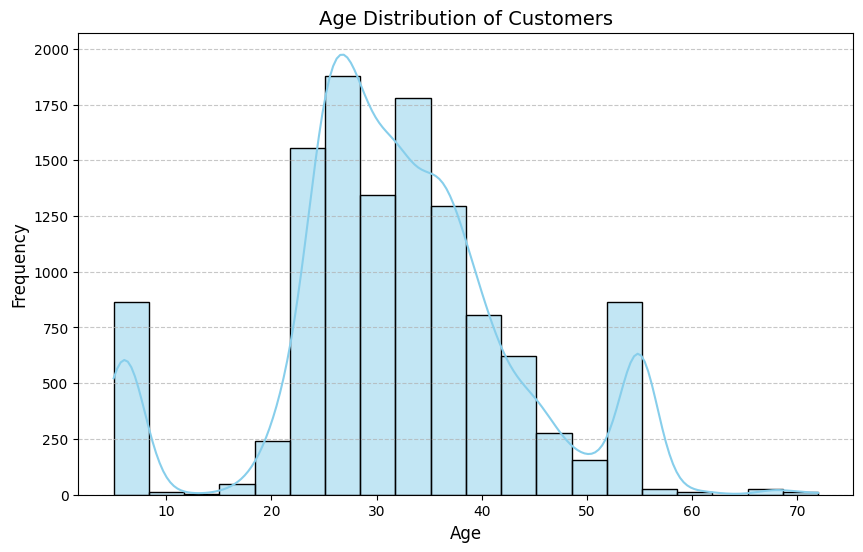

In [ ]:
from datetime import datetime
# orders by age distribution
df_with_dob = df_order_full_copy[df_order_full_copy['dob'].notna()]
current_year = datetime.now().year
df_with_dob['age'] = current_year - df_with_dob['dob']
plt.figure(figsize=(10, 6))
sns.histplot(df_with_dob['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers', fontsize=14) # exclude NaN
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Vendor Analysis


In [ ]:
restaurant_popularity = df_order_full_copy['vendor_id'].value_counts()
restaurant_popularity

,count
vendor_id,
113,7804
105,5552
79,5103
84,4998
78,4639
...,...
304,561
271,559
196,512


In [ ]:
restaurant_popularity.describe()

,count
count,100.00000
mean,1349.45000
std,1177.29876
min,474.00000
25%,722.50000
50%,939.00000
75%,1527.75000
max,7804.00000


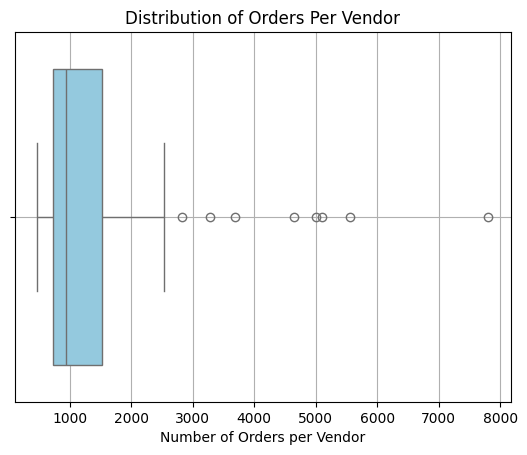

In [ ]:
sns.boxplot(x=restaurant_popularity, color='skyblue')
plt.xlabel("Number of Orders per Vendor")
plt.title("Distribution of Orders Per Vendor")
plt.grid(True)
plt.show()

In [ ]:
# Of the orders, what tags are most common
all_tags = df_order_full_copy['vendor_tag_name'].str.split(',').explode()
tag_counts = Counter(all_tags)
tag_counts.most_common()

[('Desserts', 66002),
 ('Burgers', 58948),
 ('Sandwiches', 48957),
 ('Free Delivery', 42896),
 ('Salads', 37107),
 ('American', 34628),
 ('Pasta', 30125),
 ('Breakfast', 29897),
 ('Fries', 24987),
 ('Fresh Juices', 20836),
 ('Arabic', 20550),
 ('Shawarma', 20008),
 ('Kids meal', 20008),
 ('Indian', 16803),
 ('Soups', 14999),
 ('Milkshakes', 14266),
 ('Mojitos ', 12963),
 ('Pizzas', 12469),
 ('Grills', 12097),
 ('Ice creams', 11598),
 ('Hot Dogs', 11469),
 ('Rice', 7963),
 ('Cafe', 7467),
 ('Italian', 7389),
 ('Biryani', 6220),
 ('Smoothies', 5294),
 ('Donuts', 4981),
 ('Lebanese', 4831),
 ('Cakes', 4826),
 ('Asian', 4772),
 ('Healthy Food', 4752),
 ('Crepes', 4219),
 ('Pancakes', 4073),
 ('Waffles', 4073),
 ('Steaks', 3881),
 ('Coffee', 3562),
 ('Omani', 3546),
 ('Churros', 3272),
 ('Mexican', 3140),
 ('Sweets', 3099),
 ('Mishkak', 2896),
 ('Mojitos', 2815),
 ('Kebabs', 2815),
 ('Japanese', 2434),
 (nan, 2158),
 ('Hot Chocolate', 2077),
 ('Rolls', 1748),
 ('Thali', 1745),
 ('Vegetarian

### Location Analysis

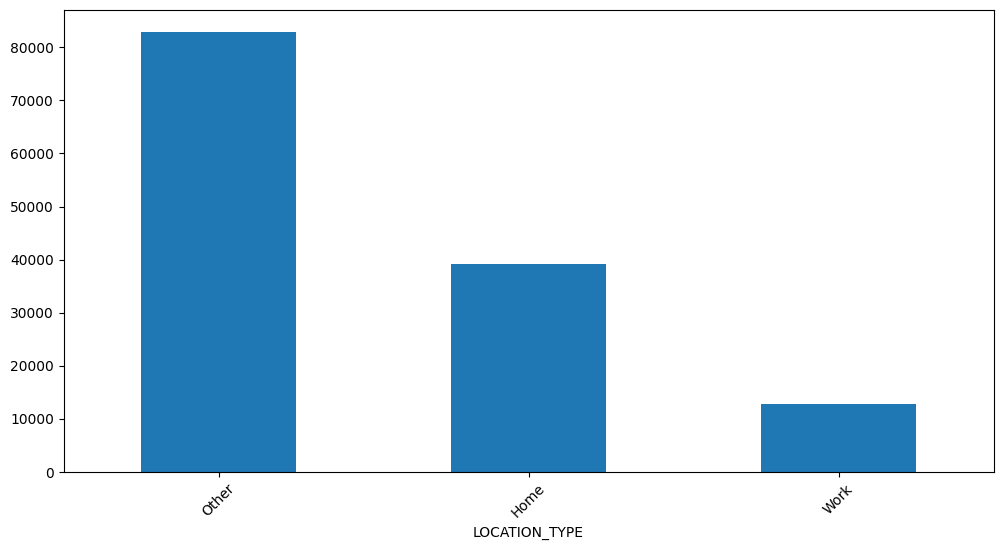

In [ ]:
# view distribution of order location type
counts = df_order_full_copy.LOCATION_TYPE.value_counts()
counts.plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

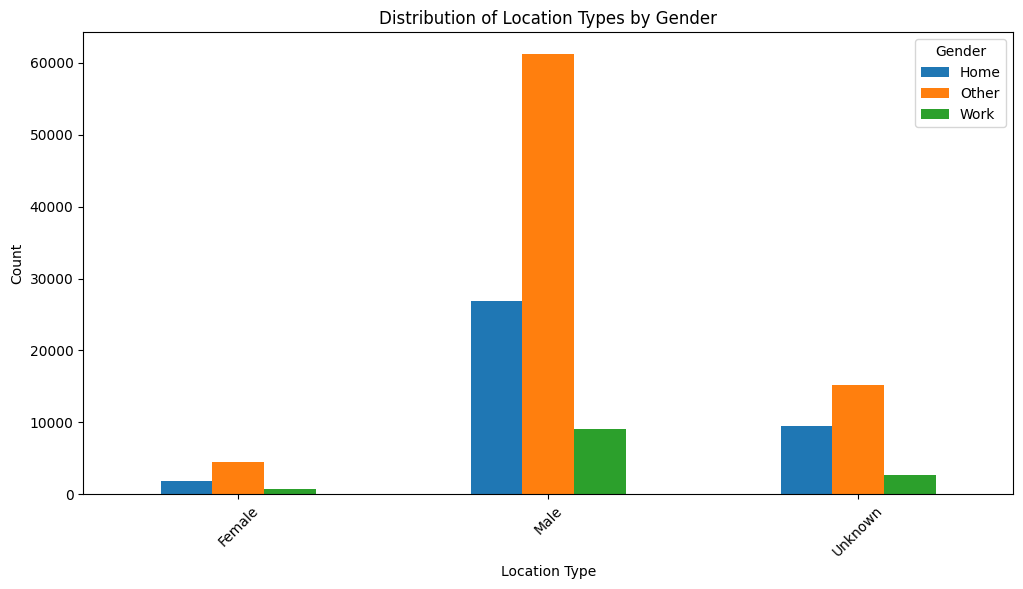

In [ ]:
counts = df_order_full_copy.groupby(['gender', 'LOCATION_TYPE']).size().unstack()
counts.plot(kind='bar', figsize=(12, 6))

plt.xlabel("Location Type")
plt.ylabel("Count")
plt.title("Distribution of Location Types by Gender")
plt.xticks(rotation=45)
plt.legend(title="Gender")

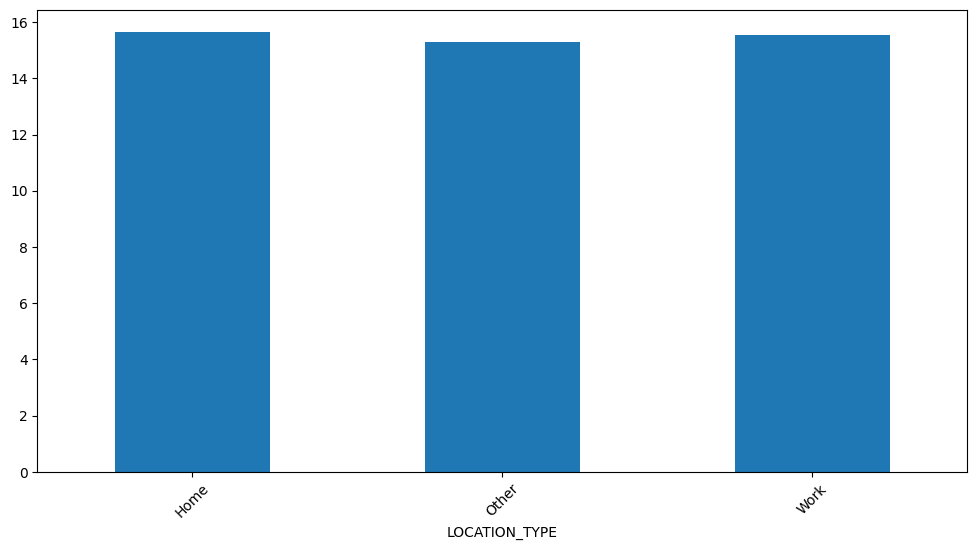

In [ ]:
# view avergae spending of orders in different location types
location_average_spending = df_order_full_copy.groupby('LOCATION_TYPE')['grand_total'].mean()
location_average_spending.plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

There isn't much difference on avergae spending of orders in different location types.

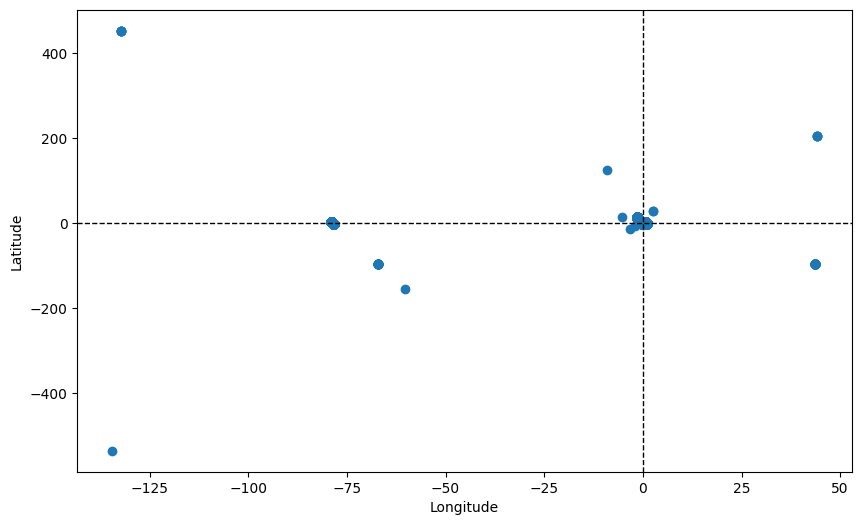

In [ ]:
# visualize order position
plt.figure(figsize=(10, 6))
plt.scatter(df_order_full_copy.longitude, df_order_full_copy.latitude)

plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)

plt.show()

There are some outliers in terms of location.

In [ ]:
df_order_full_copy.latitude.describe()

,latitude
count,134945.000000
mean,-0.025569
std,4.345440
min,-535.818578
25%,-0.412135
50%,-0.075567
75%,0.207685
max,453.653846


The range of latitude is different from reality. By variable definition, latitute and longitude are not true value. They are masked due to customers privacy, but it can still be used to analyze nearby locations.

In [ ]:
pd.set_option('display.max_columns', None)
df_order_full_copy.head()

,index,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,driver_rating,deliverydistance,preparationtime,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,gender,dob,LOCATION_TYPE,latitude,longitude,latitude_vendor,longtitude_vendor,vendor_category_en,delivery_charge,vendor_tag_name
0,0,163238.0,92PEE24,1.0,7.6,2,0,0.0,0.0,No,No,0.0,0.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,Male,NaN,Other,-0.132100,-78.575297,-0.967769,0.080839,Restaurants,0.0,"American,Burgers,Free Delivery,Hot Dogs,Pasta"
1,1,163240.0,QS68UD8,1.0,8.7,1,0,0.0,0.0,No,No,0.0,0.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Unknown,NaN,Work,-0.393396,-78.544417,-1.271979,0.028832,Restaurants,0.0,"Burgers,Desserts,Free Delivery,Grills,Mexican"
2,2,163241.0,MB7VY5F,2.0,14.4,1,0,0.0,0.0,No,No,0.0,0.0,0.0,50.0,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,Unknown,NaN,Other,-1.072823,-78.464121,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic"
3,3,163244.0,KDJ951Y,1.0,7.1,1,0,0.0,0.0,No,No,0.0,0.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Male,NaN,Home,-0.292713,-78.556316,-0.601096,0.095998,Restaurants,0.0,"American,Burgers,Desserts,Mojitos ,Pasta"
4,4,163245.0,BAL0RVT,4.0,27.2,1,0,0.0,0.0,No,No,0.0,0.0,0.0,50.0,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Male,NaN,Work,-0.231810,-78.563513,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic"


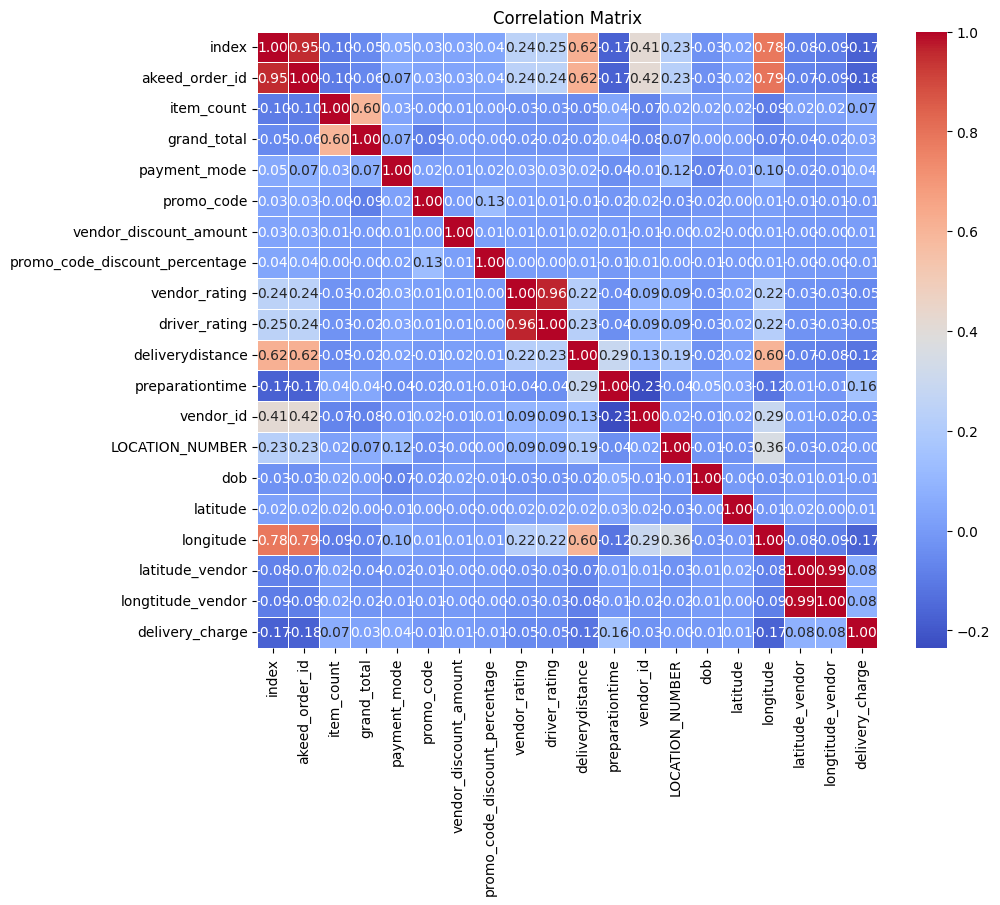

In [ ]:
#corr plot
numerical_var_df = df_order_full_copy.select_dtypes(include=['number'])
corr_matrix = numerical_var_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Convert time columns to datetime format
df_order_full_copy['order_accepted_time'] = pd.to_datetime(df_order_full_copy['order_accepted_time'], errors='coerce')
df_order_full_copy['driver_accepted_time'] = pd.to_datetime(df_order_full_copy['driver_accepted_time'], errors='coerce')
df_order_full_copy['ready_for_pickup_time'] = pd.to_datetime(df_order_full_copy['ready_for_pickup_time'], errors='coerce')
df_order_full_copy['picked_up_time'] = pd.to_datetime(df_order_full_copy['picked_up_time'], errors='coerce')
df_order_full_copy['delivered_time'] = pd.to_datetime(df_order_full_copy['delivered_time'], errors='coerce')
df_order_full_copy['delivery_date'] = pd.to_datetime(df_order_full_copy['delivery_date'], errors='coerce')

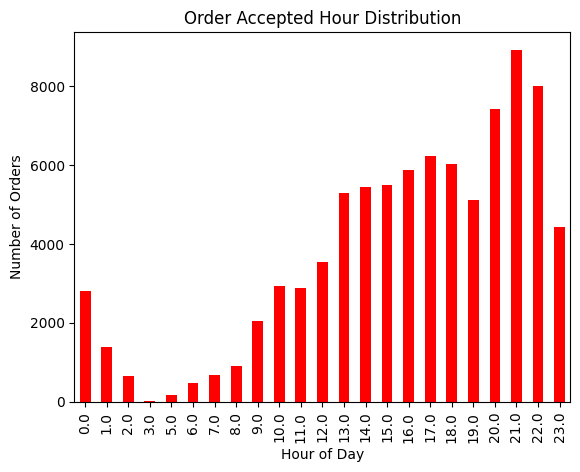

In [ ]:
#plot when in the day orders are being made
df_order_full_copy['order_accepted_hour'] = df_order_full_copy['order_accepted_time'].dt.hour

df_order_full_copy['order_accepted_hour'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Order Accepted Hour Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

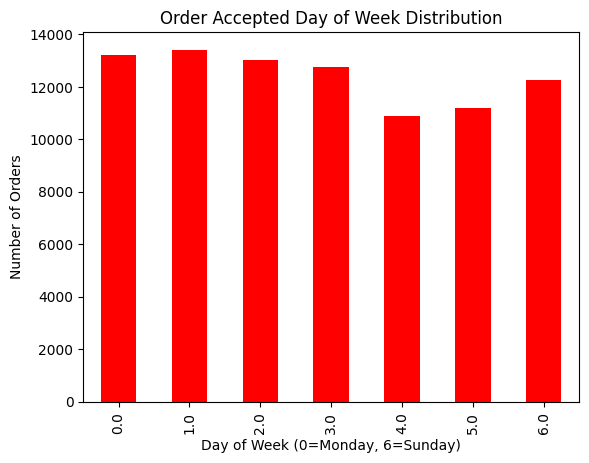

In [ ]:
#plot which days of week the order came
df_order_full_copy['day_of_week'] = df_order_full_copy['order_accepted_time'].dt.dayofweek
df_order_full_copy['day_of_week'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Order Accepted Day of Week Distribution')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Orders')
plt.show()

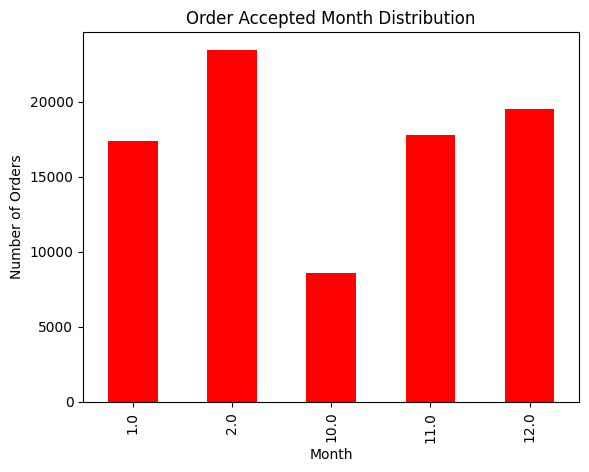

In [ ]:
#plot month of order
df_order_full_copy['month'] = df_order_full_copy['order_accepted_time'].dt.month
df_order_full_copy['month'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Order Accepted Month Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

It seems there is only data from 5 months?

In [ ]:
df_order_full_copy

,index,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,driver_rating,deliverydistance,preparationtime,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,gender,dob,LOCATION_TYPE,latitude,longitude,latitude_vendor,longtitude_vendor,vendor_category_en,delivery_charge,vendor_tag_name,order_accepted_hour,day_of_week,month
0,0,163238.0,92PEE24,1.0,7.6,2,0,0.0,0.0,No,No,0.0,0.0,0.00,45.0,NaT,NaT,NaT,NaT,NaT,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,Male,NaN,Other,-0.132100,-78.575297,-0.967769,0.080839,Restaurants,0.0,"American,Burgers,Free Delivery,Hot Dogs,Pasta",NaN,NaN,NaN
1,1,163240.0,QS68UD8,1.0,8.7,1,0,0.0,0.0,No,No,0.0,0.0,0.00,45.0,NaT,NaT,NaT,NaT,NaT,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Unknown,NaN,Work,-0.393396,-78.544417,-1.271979,0.028832,Restaurants,0.0,"Burgers,Desserts,Free Delivery,Grills,Mexican",NaN,NaN,NaN
2,2,163241.0,MB7VY5F,2.0,14.4,1,0,0.0,0.0,No,No,0.0,0.0,0.00,50.0,NaT,NaT,NaT,NaT,NaT,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,Unknown,NaN,Other,-1.072823,-78.464121,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic",NaN,NaN,NaN
3,3,163244.0,KDJ951Y,1.0,7.1,1,0,0.0,0.0,No,No,0.0,0.0,0.00,45.0,NaT,NaT,NaT,NaT,NaT,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Male,NaN,Home,-0.292713,-78.556316,-0.601096,0.095998,Restaurants,0.0,"American,Burgers,Desserts,Mojitos ,Pasta",NaN,NaN,NaN
4,4,163245.0,BAL0RVT,4.0,27.2,1,0,0.0,0.0,No,No,0.0,0.0,0.00,50.0,NaT,NaT,NaT,NaT,NaT,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Male,NaN,Work,-0.231810,-78.563513,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134940,135211,415507.0,L6LFY6H,1.0,13.3,2,0,0.0,0.0,No,No,0.0,0.0,1.75,40.0,2020-02-29 23:48:47,2020-02-29 23:59:21,2020-03-01 00:02:10,2020-03-01 00:22:53,2020-03-01 00:29:42,NaT,67,2020-02-29 23:47:59,0,Unknown,NaN,Other,-0.207822,0.473790,-0.181038,0.490518,Restaurants,0.0,"Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...",23.0,5.0,2.0
134941,135212,415508.0,2GMMVGI,3.0,9.5,1,0,0.0,0.0,No,Yes,5.0,4.0,12.81,60.0,2020-02-29 23:49:50,2020-03-01 00:19:46,2020-03-01 00:20:05,2020-03-01 00:27:50,2020-03-01 01:03:14,NaT,79,2020-02-29 23:48:37,0,Male,NaN,Work,1.742466,0.377535,0.634654,0.527255,Restaurants,0.0,"Burgers,Desserts,Free Delivery,Pasta,Sandwiches",23.0,5.0,2.0
134942,135213,415510.0,LYTAAV0,4.0,18.2,2,0,0.0,0.0,No,No,0.0,0.0,11.15,45.0,2020-02-29 23:49:16,2020-03-01 00:04:28,2020-03-01 00:10:34,2020-03-01 00:14:43,2020-03-01 00:36:37,NaT,28,2020-02-29 23:48:43,2,Male,NaN,Other,0.688098,0.417760,0.480602,0.552850,Restaurants,0.7,Burgers,23.0,5.0,2.0
134943,135214,415512.0,NEV9A5D,3.0,7.7,1,1,0.0,0.0,No,No,0.0,0.0,2.29,35.0,2020-02-29 23:54:38,2020-03-01 00:06:14,2020-03-01 00:08:10,2020-03-01 00:22:11,2020-03-01 00:36:52,NaT,841,2020-02-29 23:50:10,0,Unknown,NaN,Other,-0.701674,0.724363,-0.496138,0.740214,Restaurants,0.0,"American,Breakfast,Burgers,Cafe,Desserts,Free ...",23.0,5.0,2.0


In [ ]:
df_order_full_copy.columns

NameError: name 'df_order_full_copy' is not defined